In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/人工智慧/CNN辨識貓&狗')

Mounted at /content/drive


### 解壓縮檔案


In [ ]:
!unzip archive.zip

In [ ]:
import os, shutil

root_dir = '/content/drive/My Drive/Colab Notebooks/人工智慧/CNN辨識貓&狗/'  #解壓縮資料夾所在的目錄路徑
#if not os.path.isdir(root_dir): 
#  os.mkdir(root_dir)  #如果目錄不存在, 才建立目錄

# store our smaller dataset（保存較小數據集的目錄）
base_dir = os.path.join(root_dir,'cats_and_dogs_small')
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
###訓練集###
train_dir = os.path.join(base_dir, 'train') #訓練集的目錄位置
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

train_cats_dir = os.path.join(train_dir, 'cats') #用來訓練貓圖片的目錄位置
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
 
train_dogs_dir = os.path.join(train_dir, 'dogs') #用來訓練狗圖片的目錄位置
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
###驗證集###
validation_dir = os.path.join(base_dir, 'validation') #驗證集的目錄位置
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
validation_cats_dir = os.path.join(validation_dir, 'cats') #用來驗證貓圖片的目錄位置
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') #用來驗證狗圖片的目錄位置
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
###測試集###
test_dir = os.path.join(base_dir, 'test') #測試集的目錄位置
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
  
test_cats_dir = os.path.join(test_dir, 'cats') #用來測試貓圖片的目錄位置
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') #用來測試狗圖片的目錄位置
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

## 複製圖像至小型數據集

In [ ]:
###貓###

#將前1000張貓的圖像複製到 train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/cats/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#將接下來500張貓的圖像複製到 validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/cats/', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#將接下來的500張貓的圖像複製到 test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/cats/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
###狗###

#將前1000張狗的圖像複製到 train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/dogs/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#將接下來500張狗的圖像複製到 validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/dogs/', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#將接下來500張狗的圖像複製到 test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(root_dir,'training_set/dogs/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('###training###')
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('###validing###')
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))
print('###testing###')
print('測試用的貓照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的狗照片張數:', len(os.listdir(test_dogs_dir)))

###training###
訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
###validing###
驗證用的貓照片張數: 500
驗證驗證用的狗照片張數: 500
###testing###
測試用的貓照片張數: 500
測試用的狗照片張數: 500


### 為狗 vs. 貓分類實作的一個小型的卷積神經網路

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# 注意 : 等一下輸入的貓狗圖形大小必須是150×150 RGB 的圖形格式.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()  # 查看模型摘要

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

### 配置 model 以進行訓練- optimizer RootMeanSquare with LearningRate = 0.0001

In [ ]:
from tensorflow.keras import optimizers
import tensorflow as tf

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 使用 keras 影像的 preprocessing 副程式 ImageDataGenerator 產生器從目錄中讀取影像

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
image_datagen = ImageDataGenerator(rescale=1./255)

train_generator = image_datagen.flow_from_directory(
    train_dir,            #目標目錄
    target_size=(150, 150), #調整所有影像大小成 150x150
    batch_size=20,          #每次抓20筆資料
    class_mode='binary')    #答案只有貓跟狗兩種，所以使用二位元標籤

validation_generator = image_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = image_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator[0][0].shape

(20, 150, 150, 3)

In [ ]:
train_generator[0][1]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1.], dtype=float32)

In [ ]:
#看看產生器的輸出結果(只抓取一筆看看)
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
run = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 0.6932 - acc: 0.5425 - val_loss: 0.6767 - val_acc: 0.5430
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6671 - acc: 0.6060 - val_loss: 0.6877 - val_acc: 0.5390
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.6223 - acc: 0.6535 - val_loss: 0.6231 - val_acc: 0.6430
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.5729 - acc: 0.7020 - val_loss: 0.5979 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 127s 1s/step - loss: 0.5312 - acc: 0.7270 - val_loss: 0.5800 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 127s 1s/step - loss: 0.5066 - acc: 0.7460 - val_loss: 0.6134 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 111s 1s/step - loss: 0.4757 - acc: 0.7710 - val_loss: 0.5941 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 107s 1s/step - 

In [ ]:
#用測試資料評估模型的準確度
test_loss, test_acc = model.evaluate(test_generator)
print('test_acc:', test_acc)

50/50 [==============================] - 16s 307ms/step - loss: 0.9615 - acc: 0.7210
test_acc: 0.7210000157356262


In [ ]:
#儲存模型
model.save('CNN_cats&dogs_small.h5')

### 分別繪製訓練過程中模型在訓練數據和驗證數據上的損失和精度

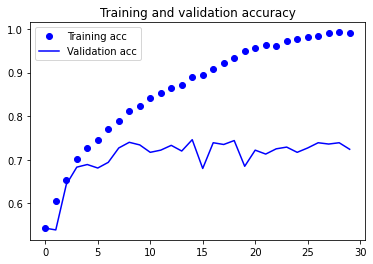

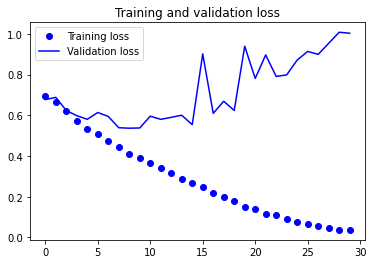

In [ ]:
import matplotlib.pyplot as plt

acc = run.history['acc']
val_acc = run.history['val_acc']
loss = run.history['loss']
val_loss = run.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 雖然訓練的準確率很高(99%)，但從這些圖像中能看出過擬合的特徵(因爲訓練樣本相對較少)

### **使用數據增強**

過擬合的原因是學習樣本太少，導致無法訓練出能夠泛化到新數據的模型。如果擁有無限的數據，那麼模型能夠觀察到數據分佈的所有內容，這樣就永遠不會過擬合。數據增強是從現有的訓練樣本中生成更多的訓練數據，其方法是利用多種能夠生成可信圖像的隨機變換來增加（augment）樣本。其目標是，模型在訓練時不會兩次查看完全相同的圖像。這讓模型能夠觀察到數據的更多內容，從而具有更好的泛化能力。

## 重新訓練模型

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
#訓練這個使用了數據增強和 dropout 的網絡
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #角度值（在 0~180 範圍內），表示圖像隨機旋轉的角度範圍
    width_shift_range=0.2, #圖像在水平方向上平移的範圍（相對於總寬度或總高度的比例）
    height_shift_range=0.2, #圖像在垂直方向上平移的範圍（相對於總寬度或總高度的比例）
    shear_range=0.2, #隨機錯切變換的角度
    zoom_range=0.2, #圖像隨機縮放的範圍 
    horizontal_flip=True,) #隨機將一半圖像水平翻轉

#注意，不能增強驗證數據
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32, #這次取每次抓32筆資料
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
run = model.fit(
      train_generator,
      steps_per_epoch=60, #2000(總共)/32(每次抓取) ＝ 62.5 抓個大概60
      epochs=50, 
      validation_data=validation_generator,
      validation_steps=30) #1000/32 ＝ 31.25 抓個大概30

Epoch 1/50
60/60 [==============================] - 111s 2s/step - loss: 0.6938 - acc: 0.5026 - val_loss: 0.6976 - val_acc: 0.4979
Epoch 2/50
60/60 [==============================] - 108s 2s/step - loss: 0.6914 - acc: 0.5352 - val_loss: 0.6809 - val_acc: 0.6042
Epoch 3/50
60/60 [==============================] - 108s 2s/step - loss: 0.6813 - acc: 0.5704 - val_loss: 0.6681 - val_acc: 0.5854
Epoch 4/50
60/60 [==============================] - 107s 2s/step - loss: 0.6730 - acc: 0.5746 - val_loss: 0.6665 - val_acc: 0.5917
Epoch 5/50
60/60 [==============================] - 108s 2s/step - loss: 0.6702 - acc: 0.5830 - val_loss: 0.6870 - val_acc: 0.5490
Epoch 6/50
60/60 [==============================] - 108s 2s/step - loss: 0.6614 - acc: 0.5966 - val_loss: 0.6336 - val_acc: 0.6396
Epoch 7/50
60/60 [==============================] - 108s 2s/step - loss: 0.6523 - acc: 0.6150 - val_loss: 0.6320 - val_acc: 0.6375
Epoch 8/50
60/60 [==============================] - 108s 2s/step - loss: 0.6473 - a

In [ ]:
#儲存模型
model.save('cats_and_dogs_small_2.h5')

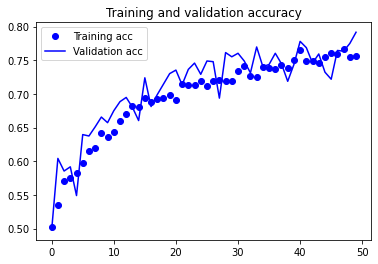

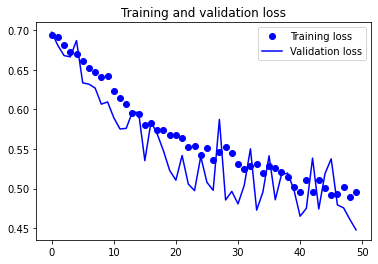

In [ ]:
#再次畫出結果
acc = run.history['acc']
val_acc = run.history['val_acc']
loss = run.history['loss']
val_loss = run.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 由重新訓練過後的上圖可以看到使用數據增強後的Training acc有隨著Validation acc一起移動了，表示此模型沒有發生過度擬合的情形，且驗證準確率也到達了80%左右(如過設定epoch更高的話可以達到更高的準確率，但因為跑的時間有點久，所以這邊只設定epoch=50)